<a href="https://colab.research.google.com/github/realtechz/Tensorflow_zero_to_mastery/blob/main/01_TF_regression/01_NN_regression_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
#01_TF_regression/

# Introduction to Regression with Neural Networks in Tensorflow

There are many defintions for a regression problem but in our case, we are going to simplify it: Predicting a numercial variable base on some other combination of variables , even shorter.. predicting a number.

In [159]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating data to view and fit 

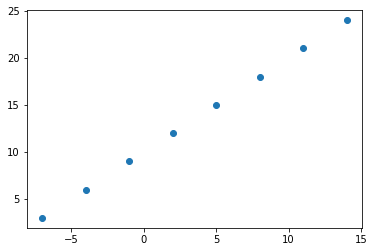

In [160]:
import numpy as np
import matplotlib.pyplot as plt


# create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y= np.array([3.0, 6.0, 9.0, 12.0,15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [161]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes


In [162]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info,house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [163]:
X[0], y[0]

(-7.0, 3.0)

In [164]:
X[1], y[1]

(-4.0, 6.0)

In [165]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [166]:
X[0].ndim

0

 in simple words we are going to use 1 x to predict 1 y


In [167]:
#Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [168]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

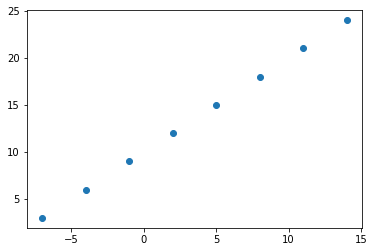

In [169]:
plt.scatter(X, y)

## Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hiddem layers of a deep learning mode.
2. **Compiling a model** - define the loss function( in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns) and evaluation metrics( what we can use to interpret the performance of our model).
3.**Fitting a model** - letting the model try to find patterns between X and Y (features and labels).

In [170]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential(
    [
                             tf.keras.layers.Dense(1)
    ])

# 2. compilethe model
model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) # mae is short for mean absolute error)

# 3. Fit the model
model.fit(X, y, epochs= 5)

Epoch 1/5
1/1 [==============================] - 0s 217ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [171]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [172]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [173]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

we can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might can add more layers, increase the number of hidden units
( also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling the model**- here we might change the optimization function or prehaps the **learning rate** of the optimization function.
3.**Fitting a model** - here we might fit a model for more **epochs** ( leave it training for longer ) or on more data.

In [174]:
# Lets rebuild our model
tf.random.set_seed(42)
# 1. create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit the model (this time we will train it for longer)
model.fit(X, y, epochs = 100)


Epoch 1/100
1/1 [==============================] - 0s 225ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 3m

In [175]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [176]:
# Lets see if our model's prediction has improved
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [177]:
# lets see what we can do to improve it futher

# 1. create the model ( this time with an extra hidden layer with 100 hidden units )
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation = "relu"),
                            tf.keras.layers.Dense(1)
])

# 2 . compiling the model 
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

# 3. fitting the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 236ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.2859 - mae: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.6279 - mae: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.9702 - mae: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.3044 - mae: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6244 - mae: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 9.9248 - mae: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.1949 - mae: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.4303 - mae: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.6245 - mae: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 2ms/step -

In [178]:
model.predict([17.0])

array([[31.941301]], dtype=float32)

In [179]:
# lets see what we can do to improve it futher

# 1. create the model ( this time with an extra hidden layer with 100 hidden units )
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation = None),
                            tf.keras.layers.Dense(1)
])

# 2 . compiling the model 
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

# 3. fitting the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 271ms/step - loss: 14.2261 - mae: 14.2261
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 13.5327 - mae: 13.5327
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.8450 - mae: 12.8450
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.1610 - mae: 12.1610
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.4786 - mae: 11.4786
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.7952 - mae: 10.7952
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1084 - mae: 10.1084
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.4153 - mae: 9.4153
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7133 - mae: 8.7133
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.9998 - mae: 7.9998
Epoch 11/100
1/1 [==============================] - 0s 2ms/step

In [180]:
model.predict([17.0])

array([[27.13871]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural network is:

build the model -> fit it -> evaluate it and start again

when it comes to evaluation ... there are 3 words you should memorize:

 > "Visualize, visualize, visualize"

Its a good idea to visualize:
* the data - what data are we working with? what does it look like?
* the model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* the predictions of the model - how do he predictions of a model lin eup against the ground truth ( the original labels) ?


In [181]:
# make a bigger dataset
X = tf.range( -100, 100 , 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [182]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

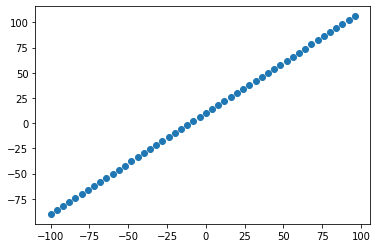

In [183]:
plt.scatter(X,y)

### The 3 sets... 

* **train set**- 70-80% of the data
* **Validation set** - 10-15% of the data
* **test set** - 10-15 % of the data

In [184]:
len(X)

50

In [185]:
# split the data into train and test sets 
X_train = X[:40]
y_train = X[:40]

X_test = X[40:]
y_test= y[40:]

In [186]:
len(X_train), len(X_test)

(40, 10)

### Visualizing the data

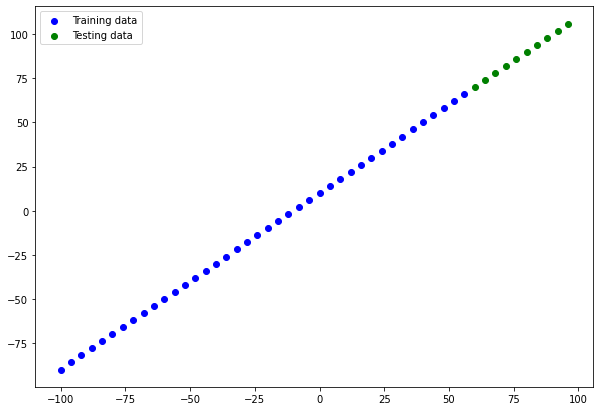

In [187]:
X = tf.range( -100, 100 , 4)
y = X + 10

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test= y[40:]

plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

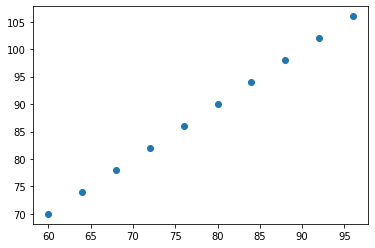

In [188]:
plt.scatter(X_test,y_test)

In [189]:
# lets see what we can do to improve it futher

# 1. create the model ( this time with an extra hidden layer with 100 hidden units )
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(1)
])

# 2 . compiling the model 
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

# 3. fitting the model
#model.fit(X_train, y_train, epochs = 100)

### visualizing a model

In [190]:
#model.summary()
#will get a error if the model is not run at least once or inputshape is not given

In [191]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(10 , input_shape = [1], name = "Inpur_layer"),
                            tf.keras.layers.Dense(1, name = "Output_layer")
                            
], name = "my_model")

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate= 0.01),
              loss = tf.keras.losses.mae,
              metrics = ["mae"])
model.fit(X_train,y_train, verbose = 0,epochs = 100)

In [192]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inpur_layer (Dense)          (None, 10)                20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total no of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns)
the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when you use parameters from other models during **transfer learning**)


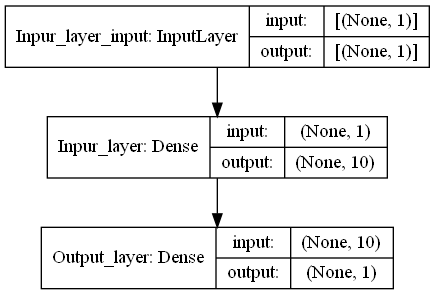

In [193]:
from tensorflow.keras.utils import plot_model

plot_model(model= model, show_shapes= True)

### Visulizing our models predictions

To visualize predictions , its a good idea to plot them against the ground truth labels.
often you will see this in the form of y_test or y_true versus the y_pred 

In [194]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [195]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [196]:
# lets create a plotting function

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth 
  """
  plt.figure(figsize= (10,7))
  # Plot the training data in blue 
  plt.scatter(train_data, train_labels, c ="b", label = "training data")
  # Plot the testing data in green 
  plt.scatter(test_data, test_labels, c ="g", label = "testing data")
  # Plot models predictions in red
  plt.scatter(test_data,predictions, c = "r", label = "predictions")
  plt.legend();


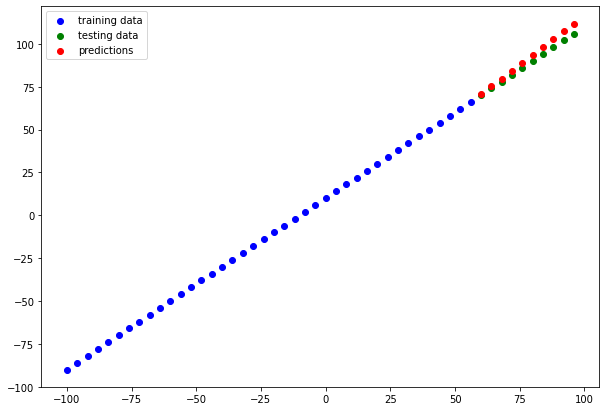

In [197]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)

### Evaluating our models prediction with regression evaluation metrics

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [198]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 81ms/step - loss: 3.1969 - mae: 3.1969


[3.196946620941162, 3.196946620941162]

In [199]:
# calcuate the mean absolute error instead of using evaluate method
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558247, 14.116051, 11.708944, 10.336927, 10.      , 10.698161,
       12.447118, 15.333008, 19.253975, 23.841705], dtype=float32)>

In [200]:
y_pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [201]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [202]:
#notice how the the tensors are of not the same shape
# so first convert y_pred to tensor then we can squeeze it or reshape it
y_pred_tensor = tf.constant(y_pred)
y_pred_tensor

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)>

In [203]:
y_pred_tensor_reshaped  = tf.reshape(y_pred_tensor,(10,))
# not we can use even the squeeze function
y_pred_tensor_reshaped 

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55219 ,  75.139915,  79.72764 ,  84.31536 ,  88.90308 ,
        93.49081 ,  98.07853 , 102.66626 , 107.253975, 111.841705],
      dtype=float32)>

In [204]:
# now lets pass this into the metrics to directly calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_tensor_reshaped)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [205]:
# calculate the mean square error
MSE = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_tensor_reshaped)
MSE

<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>

In [206]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

###**Running experiments to improve a model**
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:


*   **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
* **Make your model larger** (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
* Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

* model_1 - same as original model, 1 layer, trained for 100 epochs.
* model_2 - 2 layers, trained for 100 epochs.
* model_3 - 2 layers, trained for 500 epochs.

Build model_1

In [208]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, y_train,verbose=0, epochs=100)

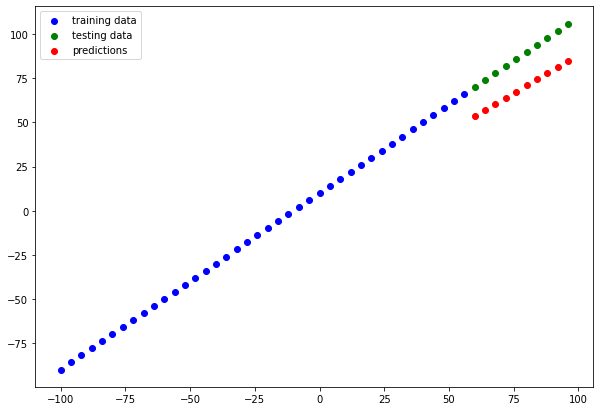

In [209]:

# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [210]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.5734)

Build model_2

In [211]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0) # set verbose to 0 for less output

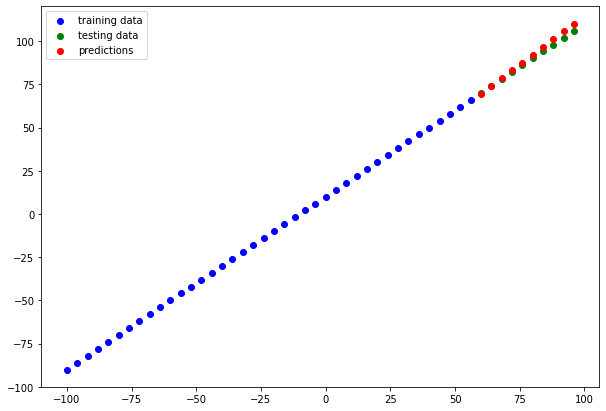

In [212]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [213]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098641, 5.4595404)

Build model_3

In [214]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(X_train, y_train, epochs=500, verbose=0) # set verbose to 0 for less output

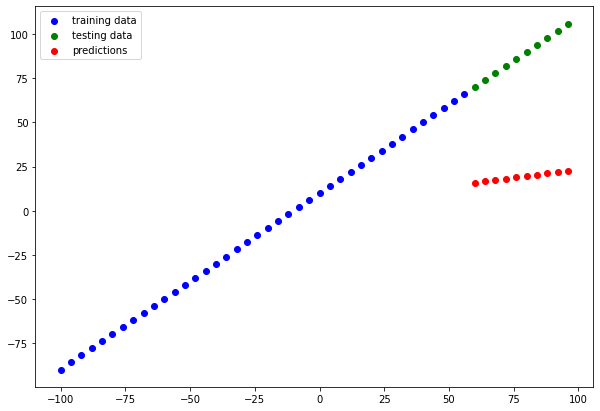

In [215]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [216]:

# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.687874, 4804.4736)

### Comparing results

In [218]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [219]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,1.909864,5.459540
2,model_3,68.687874,68.687874


From our experiments, it looks like model_2 performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.

`🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".`

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

## Tracking your experiments
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

### Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1. The SavedModel format (default).
2. The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.